# Predicting used car prices

In this notebook, I'll work with the [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) dataset about used cars and their prices. The notebook first includes exploration of the dataset followed by prediction of prices.

## Import libraries

I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Read dataset

I'll read the dataset and get information about it.

In [2]:
dataset = pd.read_csv("train_data.csv")
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,3499.000000,3.499000e+03,3474.000000,3499.000000
mean,2013.373821,5.979420e+04,5.291307,9.605247
std,3.223566,1.160794e+05,0.824893,11.250112
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.344200e+04,5.000000,5.650000
75%,2016.000000,7.303650e+04,5.000000,10.250000
max,2019.000000,6.500000e+06,10.000000,97.070000


In [4]:
dataset[dataset['Price']>20]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84 kmpl,2143 CC,167.62 bhp,5.0,NaN,28.00
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,NaN,23.50
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74 kmpl,2987 CC,254.8 bhp,5.0,NaN,28.00
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,Mercedes-Benz M-Class ML 250 CDI,Kolkata,2015,58589,Diesel,Automatic,First,15.26 kmpl,2143 CC,203.2 bhp,5.0,NaN,27.75
3446,Ford Endeavour 2.2 Trend AT 4X2,Pune,2016,75000,Diesel,Automatic,First,12.62 kmpl,2198 CC,158 bhp,7.0,NaN,24.00
3453,BMW 5 Series 2003-2012 530d,Coimbatore,2016,18090,Diesel,Automatic,First,16.2 kmpl,2993 CC,258 bhp,5.0,NaN,45.73
3488,Audi Q7 3.0 TDI quattro,Coimbatore,2012,91743,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,NaN,28.55


In [5]:
dataset=dataset[dataset['Price']<=20]

In [6]:
dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,3083.000000,3083.000000,3060.000000,3083.000000
mean,2013.116769,60183.958806,5.292810,6.165806
std,3.260383,41391.540060,0.798749,4.133622
min,1998.000000,171.000000,2.000000,0.440000
25%,2011.000000,36000.000000,5.000000,3.250000
50%,2014.000000,55000.000000,5.000000,5.000000
75%,2016.000000,75000.000000,5.000000,7.750000
max,2019.000000,775000.000000,10.000000,20.000000


Let's first split the dataset into train and test datasets.

In [7]:
X_train=dataset.iloc[:,:-1]

In [8]:
y_train=dataset.iloc[:,-1]

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3083 non-null   object 
 1   Location           3083 non-null   object 
 2   Year               3083 non-null   int64  
 3   Kilometers_Driven  3083 non-null   int64  
 4   Fuel_Type          3083 non-null   object 
 5   Transmission       3083 non-null   object 
 6   Owner_Type         3083 non-null   object 
 7   Mileage            3083 non-null   object 
 8   Engine             3063 non-null   object 
 9   Power              3063 non-null   object 
 10  Seats              3060 non-null   float64
 11  New_Price          377 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 313.1+ KB


In [10]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3083 entries, 0 to 3498
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
3083 non-null   float64
dtypes: float64(1)
memory usage: 48.2 KB


In [11]:
test_dataset = pd.read_csv("test_data.csv")
test_dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,10.94
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,67.87 Lakh,21.26
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.28 kmpl,1798 CC,138.03 bhp,5.0,20.48 Lakh,11.50
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0,NaN,6.00
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.15 kmpl,1198 CC,82 bhp,6.0,NaN,4.10


In [12]:
test_dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,2520.000000,2520.000000,2503.000000,2520.000000
mean,2013.336508,57272.380556,5.261286,9.304825
std,3.333319,34435.786887,0.785846,11.100846
min,1998.000000,600.000000,0.000000,0.510000
25%,2011.000000,33704.250000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.575000
75%,2016.000000,72391.750000,5.000000,9.750000
max,2019.000000,445000.000000,8.000000,160.000000


In [13]:
test_dataset[test_dataset['Price']>20]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,67.87 Lakh,21.26
22,Mercedes-Benz S Class 2005 2013 S 350 CDI,Bangalore,2009,98000,Diesel,Automatic,Second,13.5 kmpl,2987 CC,282 bhp,5.0,NaN,25.00
24,Jaguar XJ 3.0L Premium Luxury,Hyderabad,2012,50000,Diesel,Automatic,First,12.9 kmpl,2993 CC,271.23 bhp,4.0,NaN,45.00
36,Audi A4 35 TDI Premium,Coimbatore,2016,39237,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.64
41,Land Rover Discovery Sport SD4 HSE Luxury 7S,Hyderabad,2016,62000,Diesel,Automatic,First,12.51 kmpl,2179 CC,187.7 bhp,7.0,NaN,44.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69 kmpl,2993 CC,258 bhp,5.0,NaN,48.00
2451,Audi Q3 2.0 TDI,Bangalore,2014,65630,Diesel,Automatic,First,15.73 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.75
2471,Mercedes-Benz GLA Class 200 Sport,Kochi,2018,17773,Petrol,Automatic,First,13.7 kmpl,1991 CC,183 bhp,5.0,39.22 Lakh,26.76
2497,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.54


In [14]:
test_dataset=test_dataset[test_dataset['Price']<=20]

In [15]:
test_dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,2247.000000,2247.000000,2230.000000,2247.000000
mean,2013.134401,58983.968847,5.267713,6.174700
std,3.386199,35216.620410,0.761093,4.081614
min,1998.000000,600.000000,0.000000,0.510000
25%,2011.000000,35000.000000,5.000000,3.280000
50%,2014.000000,55000.000000,5.000000,5.200000
75%,2016.000000,75000.000000,5.000000,7.750000
max,2019.000000,445000.000000,8.000000,20.000000


In [16]:
X_test=test_dataset.iloc[:,:-1]
y_test=test_dataset.iloc[:,-1]

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2519
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2247 non-null   object 
 1   Location           2247 non-null   object 
 2   Year               2247 non-null   int64  
 3   Kilometers_Driven  2247 non-null   int64  
 4   Fuel_Type          2247 non-null   object 
 5   Transmission       2247 non-null   object 
 6   Owner_Type         2247 non-null   object 
 7   Mileage            2245 non-null   object 
 8   Engine             2233 non-null   object 
 9   Power              2233 non-null   object 
 10  Seats              2230 non-null   float64
 11  New_Price          286 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 228.2+ KB


In [18]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 2247 entries, 0 to 2519
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
2247 non-null   float64
dtypes: float64(1)
memory usage: 35.1 KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

### Name

Let's explore the various cars in the dataset.

In [19]:
X_train["Name"].value_counts()

Maruti Swift VDI                    27
Mahindra XUV500 W8 2WD              26
Maruti Ritz VDi                     23
Maruti Swift VDI BSIV               23
Hyundai i10 Sportz                  20
                                    ..
Hyundai i20 Asta (o)                 1
Honda Jazz 1.2 E i VTEC              1
Maruti Ertiga Paseo VXI              1
Nissan Sunny 2011-2014 Diesel XL     1
Hyundai Xcent 1.1 CRDi S Option      1
Name: Name, Length: 1274, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [20]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [21]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

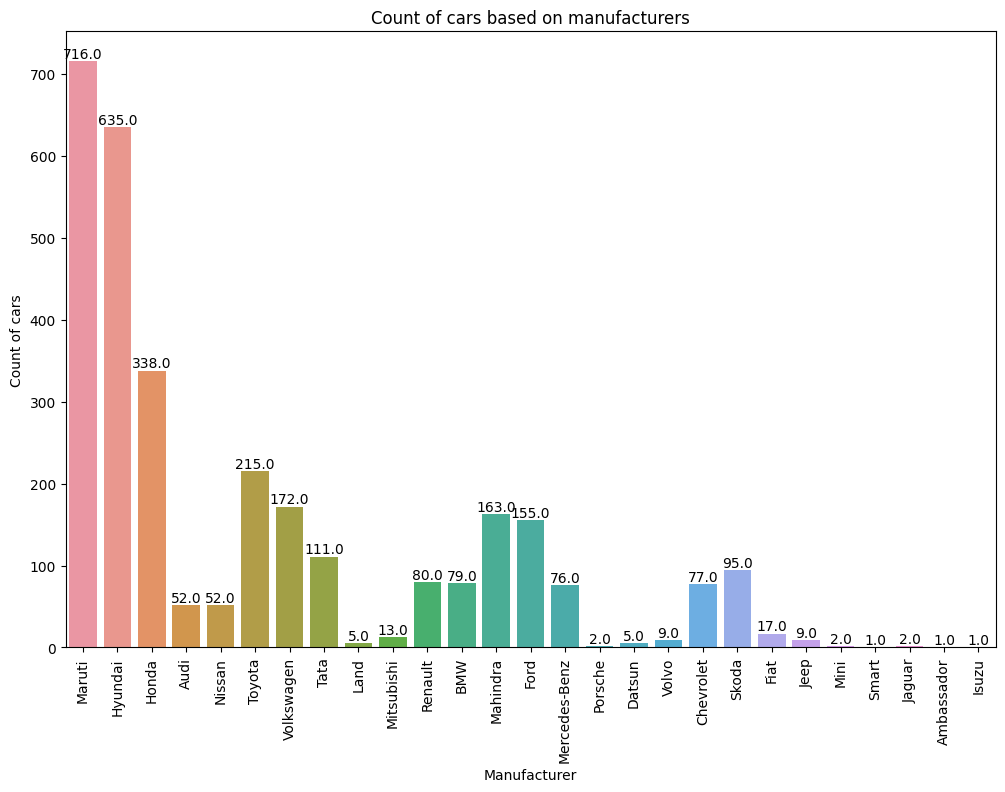

In [22]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [23]:
# X_train.drop("Name", axis = 1, inplace = True)
# X_test.drop("Name", axis = 1, inplace = True)

X_train["Name"]= X_train["Name"].str.split().str.slice(start=0,stop=3).str.join(' ')
X_test["Name"]= X_test["Name"].str.split().str.slice(start=0,stop=3).str.join(' ')

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [24]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [25]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Fuel_Type, Transmission,  and Owner_Type

All these columns are categorical columns which should be converted to dummy variables before being used.

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [26]:
X_train["Kilometers_Driven"]

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
3494    83678
3495    91000
3496    50000
3497    58000
3498    80000
Name: Kilometers_Driven, Length: 3083, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [27]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2519
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2247 non-null   object 
 1   Year               2247 non-null   int64  
 2   Kilometers_Driven  2247 non-null   int64  
 3   Fuel_Type          2247 non-null   object 
 4   Transmission       2247 non-null   object 
 5   Owner_Type         2247 non-null   object 
 6   Mileage            2245 non-null   float64
 7   Engine             2233 non-null   object 
 8   Power              2233 non-null   object 
 9   Seats              2230 non-null   float64
 10  New_Price          286 non-null    object 
 11  Manufacturer       2247 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 228.2+ KB


Let's check for missing values.

In [29]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
2


There are two missing values in X_test. No missing value in X_train. I'll replace the missing value with the mean value of the column based on the training data.

In [30]:
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [31]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [32]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [33]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### New Price

As most of the values are missing, I'll drop this column altogether.

In [34]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

In [35]:
X_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,9.883231,60183.958806,18.511534,1511.676787,101.036385,5.292810
std,3.260383,41391.540060,4.506011,494.589399,38.582303,0.795763
min,4.000000,171.000000,0.000000,624.000000,34.200000,2.000000
25%,7.000000,36000.000000,15.960000,1197.000000,74.000000,5.000000
50%,9.000000,55000.000000,18.600000,1396.000000,88.760000,5.000000
75%,12.000000,75000.000000,21.400000,1598.000000,118.000000,5.000000
max,25.000000,775000.000000,33.540000,4806.000000,500.000000,10.000000


## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [36]:
X_train = pd.get_dummies(X_train,
                         columns = ["Name","Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [37]:
X_test = pd.get_dummies(X_test,
                         columns = ["Name","Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3498
Columns: 548 entries, Year to Owner_Type_Third
dtypes: float64(4), int64(2), uint8(542)
memory usage: 1.8 MB


In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2519
Columns: 503 entries, Year to Owner_Type_Third
dtypes: float64(4), int64(2), uint8(497)
memory usage: 1.2 MB


It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [40]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

<ipython-input-40-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
<ipython-input-40-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
<ipython-input-40-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
<ipython-i

Finally, as the last step of data processing, I'll scale the data.

In [41]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [42]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3083 entries, 0 to 3498
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
3083 non-null   float64
dtypes: float64(1)
memory usage: 48.2 KB


In [43]:
y_train.describe()

count    3083.000000
mean        6.165806
std         4.133622
min         0.440000
25%         3.250000
50%         5.000000
75%         7.750000
max        20.000000
Name: Price, dtype: float64

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [53]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-2.6198404578453276e+24

The **Linear Regression** model performed with a R2 score of **0.75**.

In [54]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8700024095180117

In [55]:
import pickle

pickle.dump(rf,open('RandomForest87.pkl','wb'))

The **Random Forest** model performed the best with a R2 score of **0.85**.



In [46]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.7479619996075306

In [47]:
sv=SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
r2_score(y_test, y_pred)

0.7069444700802553

In [56]:
xg=XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.8830559408339068

In [57]:
import pickle

pickle.dump(xg,open('XGBRegressor88.pkl','wb'))

In [58]:
xg=GradientBoostingRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.8548587785915411

In [59]:
import pickle
pickle.dump(xg,open('GradientBoostRegressor85.pkl','wb'))

In [61]:
xg=HistGradientBoostingRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.8714439903049098

In [62]:
import pickle
pickle.dump(xg,open('HistGradientBoostRegressor87_1.pkl','wb'))

In [51]:
xg=linear_model.Lasso(alpha=0.1)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.780766467201788

In [63]:
xg=linear_model.BayesianRidge()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2_score(y_test, y_pred)

0.8320651324802371

In [64]:
import pickle
pickle.dump(xg,open('BayesianRidge83.pkl','wb'))